In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('yoga.csv')

In [3]:
data.columns

Index(['address', 'airport_distance', 'airport_name', 'country',
       'daily_schedule', 'duration', 'expert_tip', 'instruction_language',
       'introducing', 'listing_id', 'listing_introduction', 'program',
       'rating', 'skill_level', 'title', 'transportation', 'yoga_style'],
      dtype='object')

In [4]:
data.columns.tolist()

['address',
 'airport_distance',
 'airport_name',
 'country',
 'daily_schedule',
 'duration',
 'expert_tip',
 'instruction_language',
 'introducing',
 'listing_id',
 'listing_introduction',
 'program',
 'rating',
 'skill_level',
 'title',
 'transportation',
 'yoga_style']

In [5]:
data.head()

,address,airport_distance,airport_name,country,daily_schedule,duration,expert_tip,instruction_language,introducing,listing_id,listing_introduction,program,rating,skill_level,title,transportation,yoga_style
0,"Line up Kite and Surf Camp, Chorlitejo 7, Corr...",NaN,NaN,Spain,NaN,8,,English,Surf Holidays Spain with Yoga,47876,Join Nina for amazing yoga lessons in Corralej...,NaN,"full,full,full,full,half","Beginner,Intermediate",8 Days Line Up Yoga and Surf Camp in Fuerteven...,NaN,\nHatha\n
1,"Hosteria Papagayo Cotopaxi, Highway Panamerica...",NaN,NaN,Ecuador,"07:00 Morning meditation and journaling,08:00 ...",5,most popular,English,Relaxing Yoga Retreat Ecuador,71881,Experience the beauty and magic of the Andes w...,NaN,"full,full,full,full,full","Beginner,Intermediate,Advanced","5 Days Natural Horseback Riding, Mountain, and...",Airport transfer included: Mariscal Sucre Inte...,"\nHatha\n,\nPower\n,\nVinyasa\n,\nYin\n"
2,"Selina Santa Teresa, Santa Teresa, Puntarenas,...",NaN,NaN,Costa Rica,"07:00 - 10:00 Breakfast,10:00 Surf lesson,13:0...",7,most popular,English,Costa Rica Surf Camp and Yoga Retreat,28113,Enjoy surfing with Pura Vida Surfers while con...,The schedule during this retreat is flexible. ...,"full,full,full,full,half","Beginner,Intermediate,Advanced",7 Days Surf Camp and Yoga Holiday in Santa Ter...,NaN,"\nHatha\n,\nVinyasa\n,\nYin\n,\nRestorative\n,..."
3,"Essence Arenal Boutique Hostel, 1 km al sur de...",NaN,NaN,Costa Rica,NaN,4,,English,Rejuvenating Yoga Retreat Costa Rica,59944,Imagine practicing yoga in an enchanted Costa ...,Try something new that has 1000 years of effec...,"full,full,full,full,full","\n,\n,\n,\n","4 Days Lezaeta Thermal Hydrotherapy, Detox, an...",NaN,NaN
4,"Sannyasa Villa, Trou-aux-Biches, Mauritius",NaN,NaN,Mauritius,"06:00 - 07:00 Pranayama / Mudra / Neti,07:30 -...",8,most popular,English,Ayurveda and Yoga Retreat Mauritius,70267,"With the thorough knowledge of yoga, Ayurveda,...",Wake up to the sound of local fauna and start ...,"full,full,full,full,half","\n,\n",8 Days Yoga and Ayurvedic Detox Massages Retre...,Airport transfer included: Sir Seewoosagur Ram...,NaN


In [6]:
data.shape

(7447, 17)

In [7]:
data['yoga_style'] = data['yoga_style'].str.replace('\n','').astype(str)

In [8]:
data['expert_tip'].value_counts()

                6678
most popular     769
Name: expert_tip, dtype: int64

In [9]:
data['instruction_language'].value_counts()

English       6635
German         253
French         233
Spanish        175
Dutch          125
Italian         12
Portuguese       6
Thai             6
Indonesian       1
Japanese         1
Name: instruction_language, dtype: int64

In [10]:
lang_df = pd.DataFrame(data.groupby('instruction_language')['instruction_language'].count()).rename(columns = {
    'instruction_language':'count_number'}).sort_values('count_number',ascending=False)

lang_df

,count_number
instruction_language,
English,6635
German,253
French,233
Spanish,175
Dutch,125
Italian,12
Portuguese,6
Thai,6
Indonesian,1


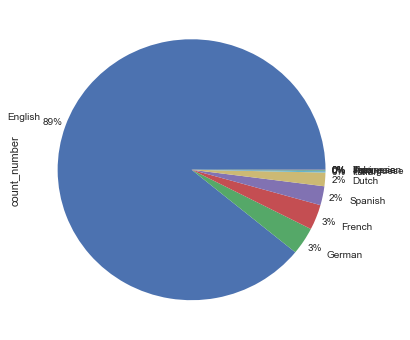

In [11]:
plot = lang_df.plot.pie(y='count_number', legend = None, figsize=(6, 6),autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)



## 89% Yoga sites using English as instruction language

In [12]:
country_df = pd.DataFrame(data.groupby('country')['country'].count()).rename(columns = {
    'country':'count'}).sort_values('count',ascending=False)

country_df = country_df[(country_df['count'] >= 20)]

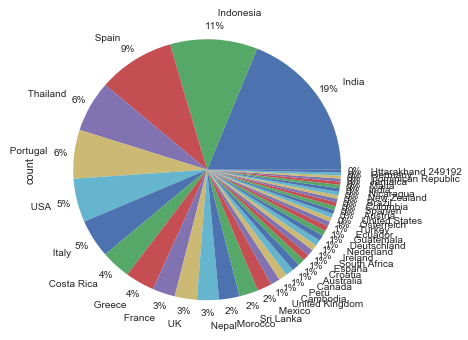

In [13]:
plot = country_df.plot.pie(y='count', legend = None, figsize=(6, 6),autopct='%1.0f%%', pctdistance=1.1, 
                           labeldistance=1.2)

In [14]:
country_df = pd.DataFrame(country_df.reset_index())

In [15]:
country_df.columns.tolist()

['country', 'count']

Text(0,0.5,'country')

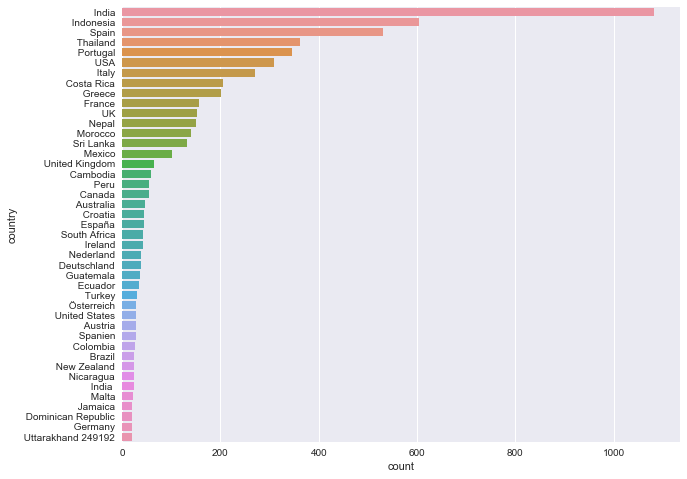

In [16]:
plt.figure(figsize=[10,8])
ax = sns.barplot(y='country', x='count', data=country_df)
ax.set_ylabel('country')

## The top 3 hosting countries: India, Indonesia & Spain 

In [17]:
data = data[pd.notnull(data['rating'])]

In [18]:
countries = ['India', 'Indonesia', 'Spain', 'Thailand', 'Portugal', 'USA', 'Italy', 'Costa Rica', 'Greece', 'France', 'UK','Nepal','Morocco']

In [19]:
rating_df = data

In [20]:
data.head()

,address,airport_distance,airport_name,country,daily_schedule,duration,expert_tip,instruction_language,introducing,listing_id,listing_introduction,program,rating,skill_level,title,transportation,yoga_style
0,"Line up Kite and Surf Camp, Chorlitejo 7, Corr...",NaN,NaN,Spain,NaN,8,,English,Surf Holidays Spain with Yoga,47876,Join Nina for amazing yoga lessons in Corralej...,NaN,"full,full,full,full,half","Beginner,Intermediate",8 Days Line Up Yoga and Surf Camp in Fuerteven...,NaN,Hatha
1,"Hosteria Papagayo Cotopaxi, Highway Panamerica...",NaN,NaN,Ecuador,"07:00 Morning meditation and journaling,08:00 ...",5,most popular,English,Relaxing Yoga Retreat Ecuador,71881,Experience the beauty and magic of the Andes w...,NaN,"full,full,full,full,full","Beginner,Intermediate,Advanced","5 Days Natural Horseback Riding, Mountain, and...",Airport transfer included: Mariscal Sucre Inte...,"Hatha,Power,Vinyasa,Yin"
2,"Selina Santa Teresa, Santa Teresa, Puntarenas,...",NaN,NaN,Costa Rica,"07:00 - 10:00 Breakfast,10:00 Surf lesson,13:0...",7,most popular,English,Costa Rica Surf Camp and Yoga Retreat,28113,Enjoy surfing with Pura Vida Surfers while con...,The schedule during this retreat is flexible. ...,"full,full,full,full,half","Beginner,Intermediate,Advanced",7 Days Surf Camp and Yoga Holiday in Santa Ter...,NaN,"Hatha,Vinyasa,Yin,Restorative,Ashtanga"
3,"Essence Arenal Boutique Hostel, 1 km al sur de...",NaN,NaN,Costa Rica,NaN,4,,English,Rejuvenating Yoga Retreat Costa Rica,59944,Imagine practicing yoga in an enchanted Costa ...,Try something new that has 1000 years of effec...,"full,full,full,full,full","\n,\n,\n,\n","4 Days Lezaeta Thermal Hydrotherapy, Detox, an...",NaN,nan
4,"Sannyasa Villa, Trou-aux-Biches, Mauritius",NaN,NaN,Mauritius,"06:00 - 07:00 Pranayama / Mudra / Neti,07:30 -...",8,most popular,English,Ayurveda and Yoga Retreat Mauritius,70267,"With the thorough knowledge of yoga, Ayurveda,...",Wake up to the sound of local fauna and start ...,"full,full,full,full,half","\n,\n",8 Days Yoga and Ayurvedic Detox Massages Retre...,Airport transfer included: Sir Seewoosagur Ram...,nan


In [21]:
def star_count(x):
    full = len(re.findall('full',x))*1
    half = len(re.findall('half',x))*.5
    return full+half

In [22]:
rating_df['rating'] = rating_df['rating'].apply(star_count)

In [23]:
data['rating'] = data['rating'].astype(str)
data.shape

(4658, 17)

In [24]:
data.groupby('expert_tip')['rating'].count()

expert_tip
                3994
most popular     664
Name: rating, dtype: int64

In [25]:
data.groupby(['expert_tip','rating'])['rating'].count()

expert_tip    rating
              3.5        378
              4.0       1057
              4.5       1442
              5.0       1117
most popular  3.5         29
              4.0        167
              4.5        343
              5.0        125
Name: rating, dtype: int64

In [26]:
rating_df = pd.DataFrame(data.groupby('rating')['rating'].count()).rename(columns = {
    'rating':'count'}).sort_values('count',ascending=False)


In [27]:
rating_df

,count
rating,
4.5,1785
5.0,1242
4.0,1224
3.5,407


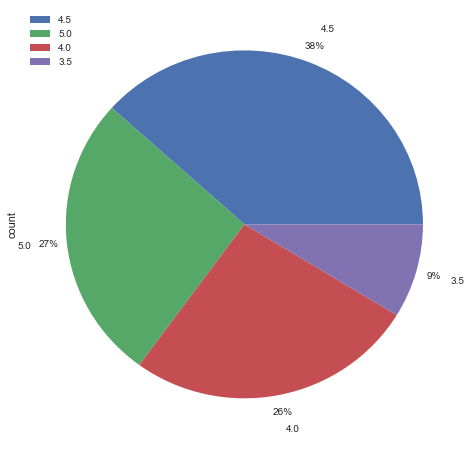

In [28]:
plot = rating_df.plot.pie(y='count', figsize=(8, 8),autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

##  General performance - 4658 rated sites.

In [29]:
data[data['skill_level'].isnull().replace(np.nan, '')].head()

,address,airport_distance,airport_name,country,daily_schedule,duration,expert_tip,instruction_language,introducing,listing_id,listing_introduction,program,rating,skill_level,title,transportation,yoga_style
118,"Adiwana Resort Jembawan, Jembawan Street 1, Ub...",27 km,Ngurah Rai International Airport,Indonesia,"07:00-08:00 Yoga class,08:00-09:00 Meditation,...",6,most popular,English,Relaxing Yoga Retreat Bali,35672,Treat yourself to more-than-just-pampering exp...,%The wellness resort is designed to offer the...,4.5,NaN,6 Days Rejuvenating Meditation and Wellness Yo...,Airport transfer included: Ngurah Rai Internat...,nan
130,"Adiwana Resort Jembawan, Jalan Jembawan 1, Ubu...",28 km,Ngurah Rai International Airport,Indonesia,"07:00-08:00 Yoga session,08:00-09:00 Daily med...",8,,English,Revitalizing Yoga Retreat Bali,35667,Take part in this revitalizing yoga retreat in...,The wellness resort is designed to offer the i...,4.5,NaN,8 Days Slimming Meditation and Yoga Holiday in...,Airport transfer included: Ngurah Rai Internat...,nan
134,"Adiwana Resort Jembawan, Jalan Jembawan 1, Ubu...",28 km,Ngurah Rai International Airport,Indonesia,"07:00-08:00 Yoga class,08:00-09:00 Meditation,...",8,,English,Blissful Yoga Retreat Bali,35638,Enjoy your time with blissful daily yoga and m...,Adiwana Resort Jembawan's wellness resort is d...,4.5,NaN,8 Days Detoxification Wellness Yoga Holiday Ub...,Airport transfer included: Ngurah Rai Internat...,nan
720,"Hotel Vishla Palace, Lower Tapovan, (Behind De...",NaN,NaN,India 249192,200 Hour Meditation Teacher Training Certifica...,23,,English,Intensive Experiential Meditation Teacher Trai...,41550,"Yoga is the science of union of body, mind and...","Yoga is the science of union of body, mind and...",4.5,NaN,23 Days 200 Hour Transformational Meditation T...,Airport transfer available: Jolly Grant Airport,nan
1856,"Mangrove Villa, Gagabada Watta, Meegama Road, ...",NaN,NaN,Sri Lanka,NaN,21,,English,Peaceful Yoga Retreat Sri Lanka,39239,Mangrove Villa offers you this detox and weigh...,The detox and weight loss yoga retreat program...,3.5,NaN,"21 Days Weight Loss, Detox, and Yoga Retreat i...",Airport transfer available: Bandaranaike Inter...,nan


In [30]:
data.shape  # removing the listings without rating, records: 4658

(4658, 17)

In [31]:
data = data[data['skill_level'].isin(['Beginner,Intermediate,Advanced',
                           'Beginner,Intermediate',
                           'Beginner',
                           'Intermediate,Advanced',
                           'Beginner,Advanced',
                           'Intermediate',
                           'Advanced'])]
#xx['skill_level'].value_counts()

In [32]:
data.shape     # removing listings without skill level mark, records: 3328

(3328, 17)

In [33]:
data.head()

,address,airport_distance,airport_name,country,daily_schedule,duration,expert_tip,instruction_language,introducing,listing_id,listing_introduction,program,rating,skill_level,title,transportation,yoga_style
0,"Line up Kite and Surf Camp, Chorlitejo 7, Corr...",NaN,NaN,Spain,NaN,8,,English,Surf Holidays Spain with Yoga,47876,Join Nina for amazing yoga lessons in Corralej...,NaN,4.5,"Beginner,Intermediate",8 Days Line Up Yoga and Surf Camp in Fuerteven...,NaN,Hatha
1,"Hosteria Papagayo Cotopaxi, Highway Panamerica...",NaN,NaN,Ecuador,"07:00 Morning meditation and journaling,08:00 ...",5,most popular,English,Relaxing Yoga Retreat Ecuador,71881,Experience the beauty and magic of the Andes w...,NaN,5.0,"Beginner,Intermediate,Advanced","5 Days Natural Horseback Riding, Mountain, and...",Airport transfer included: Mariscal Sucre Inte...,"Hatha,Power,Vinyasa,Yin"
2,"Selina Santa Teresa, Santa Teresa, Puntarenas,...",NaN,NaN,Costa Rica,"07:00 - 10:00 Breakfast,10:00 Surf lesson,13:0...",7,most popular,English,Costa Rica Surf Camp and Yoga Retreat,28113,Enjoy surfing with Pura Vida Surfers while con...,The schedule during this retreat is flexible. ...,4.5,"Beginner,Intermediate,Advanced",7 Days Surf Camp and Yoga Holiday in Santa Ter...,NaN,"Hatha,Vinyasa,Yin,Restorative,Ashtanga"
5,"La Crisalida Retreats, Avenida de Sant Marc 9,...",NaN,NaN,Spain,"07.15: Morning meditation,08.00: 90 minute mor...",6,most popular,English,Life Changing Yoga Retreat Spain,29906,La Crisalida invites you who are keen to make ...,La Crisalida Retreats is a health and wellbein...,4.0,"Beginner,Intermediate",6 Days Life Makeover and Yoga Holiday in Alica...,Airport transfer included: Alicante–Elche Airport,"Hatha,Yin,Restorative,Nidra"
6,"La Crisalida Retreats, Avenida de Sant Marc 9,...",NaN,NaN,Spain,"07.15: Morning meditation,08.00: 90 minute gui...",8,,English,Rejuvenating Yoga Retreat Spain,29846,La Crisalida welcomes you to this specially de...,The core elements of the relax and rejuvenate ...,4.0,"Beginner,Intermediate",8 Days Relax and Rejuvenate Yoga Retreat in Al...,Airport transfer included: Alicante–Elche Airport,"Hatha,Yin,Restorative,Nidra"


In [34]:
sk_level_df = pd.DataFrame(data.groupby('skill_level')['skill_level'].count()).rename(columns = {
    'skill_level':'count'}).sort_values('count',ascending=False)

In [35]:
sk_level_df

,count
skill_level,
"Beginner,Intermediate,Advanced",1942
"Beginner,Intermediate",765
Beginner,354
"Intermediate,Advanced",112
Intermediate,80
Advanced,60
"Beginner,Advanced",15


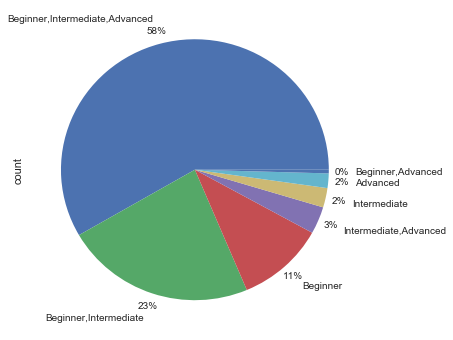

In [36]:
plot = sk_level_df.plot.pie(y='count', figsize=(6, 6),legend = None, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

## 58% of the facilities offer all level yoga skill practice.

In [37]:
def keep_num(x):
    return re.sub("[^0-9]", "", x)

data['duration'] = data["duration"].replace(np.nan, "").apply(keep_num)
data = data[data['duration']!=""]

In [38]:
temp_df = pd.DataFrame(data.groupby('duration')['duration'].count()).rename(columns = {
    'duration':'count_number'}).reset_index()

duration_df = pd.merge(data,temp_df, on = ['duration'], how = 'inner')
duration_df = duration_df[(duration_df['count_number'] >= 20)]

In [39]:
data.shape

(3260, 17)

In [40]:
duration_df['duration'] = pd.to_numeric(duration_df['duration'])
duration_df['rating'] = pd.to_numeric(duration_df['rating'])

%matplotlib inline
plt.hist(data['duration'],bins=30)


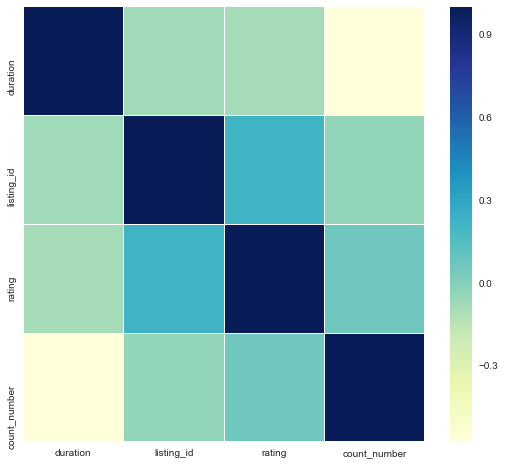

In [41]:
#ax = sns.scatterplot(x="duration", y="rating", data=aa)

#duration_df.plot.scatter(x='rating', y='duration', c='DarkBlue')
#plt.ylim(0,35)
corrmat = duration_df.corr()

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [42]:
#duration_df['duration'] = duration_df['duration'].astype(int)
duration_df['duration'] = pd.to_numeric(duration_df['duration'], errors='coerce')

/Users/lanmond/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


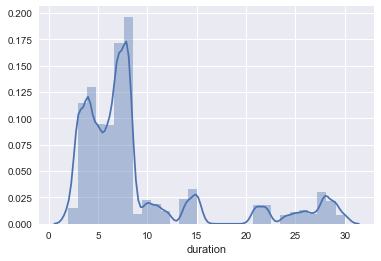

In [43]:
sns.distplot(duration_df['duration'],bins=30)

## Duration distribution

In [44]:
data['rating'] = pd.to_numeric(data['rating'])
yy=data.groupby(['country','instruction_language'])['rating'].mean().reset_index()

In [45]:
zz = data.groupby(['country','instruction_language'])['rating'].count().reset_index()
zz=zz[zz['rating'] >=30]

In [46]:
pd.merge(zz,yy, on = ['country','instruction_language'],how = 'left')

,country,instruction_language,rating_x,rating_y
0,Cambodia,English,41,4.085366
1,Costa Rica,English,70,4.492857
2,France,English,53,4.518868
3,Greece,English,79,4.544304
4,India,English,442,4.319005
5,Indonesia,English,250,4.416000
6,Italy,English,118,4.521186
7,Mexico,English,37,4.472973
8,Morocco,English,64,4.171875
9,Nepal,English,54,4.305556


## Most popular countries

In [47]:
data['rating'] = pd.to_numeric(data['rating'])
yy=data.groupby(['country'])['rating'].mean().reset_index()

In [48]:
zz = data.groupby(['country'])['rating'].count().reset_index()
zz=zz[zz['rating'] >=20]
zz.head()

,country,rating
70,Australia,23
100,Cambodia,41
113,Costa Rica,70
138,France,66
156,Greece,80


In [49]:
country_rating = pd.merge(zz,yy, on = ['country'],how = 'left')

In [50]:
country_rating = country_rating.sort_values('rating_y',ascending=False)

Text(0,0.5,'country')

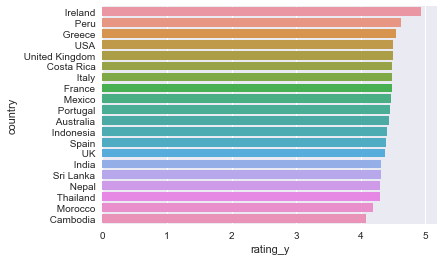

In [51]:
ax = sns.barplot(y='country', x='rating_y', data=country_rating)
ax.set_ylabel('country')

re.search("[^0-9]", "Yoga") # luke

# df = df.loc[(df.duration) != '^[a-z]']
pd.DataFrame({"origin":df["duration"],
              "bool": df["duration"].replace(np.nan, "").apply(lambda s: not re.search("[^0-9]", s))
             })   ## luke

In [52]:
?re.findall

In [53]:
data

,address,airport_distance,airport_name,country,daily_schedule,duration,expert_tip,instruction_language,introducing,listing_id,listing_introduction,program,rating,skill_level,title,transportation,yoga_style
0,"Line up Kite and Surf Camp, Chorlitejo 7, Corr...",NaN,NaN,Spain,NaN,8,,English,Surf Holidays Spain with Yoga,47876,Join Nina for amazing yoga lessons in Corralej...,NaN,4.5,"Beginner,Intermediate",8 Days Line Up Yoga and Surf Camp in Fuerteven...,NaN,Hatha
1,"Hosteria Papagayo Cotopaxi, Highway Panamerica...",NaN,NaN,Ecuador,"07:00 Morning meditation and journaling,08:00 ...",5,most popular,English,Relaxing Yoga Retreat Ecuador,71881,Experience the beauty and magic of the Andes w...,NaN,5.0,"Beginner,Intermediate,Advanced","5 Days Natural Horseback Riding, Mountain, and...",Airport transfer included: Mariscal Sucre Inte...,"Hatha,Power,Vinyasa,Yin"
2,"Selina Santa Teresa, Santa Teresa, Puntarenas,...",NaN,NaN,Costa Rica,"07:00 - 10:00 Breakfast,10:00 Surf lesson,13:0...",7,most popular,English,Costa Rica Surf Camp and Yoga Retreat,28113,Enjoy surfing with Pura Vida Surfers while con...,The schedule during this retreat is flexible. ...,4.5,"Beginner,Intermediate,Advanced",7 Days Surf Camp and Yoga Holiday in Santa Ter...,NaN,"Hatha,Vinyasa,Yin,Restorative,Ashtanga"
5,"La Crisalida Retreats, Avenida de Sant Marc 9,...",NaN,NaN,Spain,"07.15: Morning meditation,08.00: 90 minute mor...",6,most popular,English,Life Changing Yoga Retreat Spain,29906,La Crisalida invites you who are keen to make ...,La Crisalida Retreats is a health and wellbein...,4.0,"Beginner,Intermediate",6 Days Life Makeover and Yoga Holiday in Alica...,Airport transfer included: Alicante–Elche Airport,"Hatha,Yin,Restorative,Nidra"
6,"La Crisalida Retreats, Avenida de Sant Marc 9,...",NaN,NaN,Spain,"07.15: Morning meditation,08.00: 90 minute gui...",8,,English,Rejuvenating Yoga Retreat Spain,29846,La Crisalida welcomes you to this specially de...,The core elements of the relax and rejuvenate ...,4.0,"Beginner,Intermediate",8 Days Relax and Rejuvenate Yoga Retreat in Al...,Airport transfer included: Alicante–Elche Airport,"Hatha,Yin,Restorative,Nidra"
8,"Mondo Lifestyle Resort, Jalan Sempol, Gg Frang...",NaN,NaN,Indonesia,NaN,8,most popular,English,Yoga and Surf Retreat Canggu,11355,This retreat is ideal for those of you with li...,Start your day listening to nature in our morn...,4.5,"Beginner,Intermediate","8 Days Yoga and Surf Holiday in Canggu, Bali",NaN,"Vinyasa,Yin,Restorative,Ashtanga"
9,"Hotel Arno, Via Sicilia, 42, 47843 Misano Adri...",NaN,NaN,Italy,"07:30 | A strong morning Hatha yoga class,09:3...",7,most popular,English,Beach Yoga Retreat Italy,6009,"Everyday stress, aches and pains, tension, ill...","Constant stress, tension, illness, aches and p...",4.0,"Beginner,Intermediate,Advanced",7 Days Beach Yoga Retreat in Italy,NaN,Hatha
10,"Clubhouse at Land & House Park, 26/8 Moo 8 Mua...",NaN,NaN,Thailand,"06:15 - 07:15 Pranayama,07:30 - 09:30 Ashtanga...",10,,English,Yoga Retreat Thailand,22144,TAYSP offers the ideal program for experienced...,"During this retreat, you will study the main a...",4.5,"Beginner,Intermediate,Advanced",10 Days Intensive Ashtanga Yoga Retreat in Phu...,Airport transfer available: Phuket Internation...,"Power,Dynamic,Nidra,Ashtanga,Mysore,Raja,Jnana..."
11,"Quinta AltaVista, Monte Lemos, Luz, Lagos, Por...",NaN,NaN,Portugal,NaN,4,most popular,English,Rejuvenating Yoga Holiday Portugal,52652,"In this short holiday, you will have twice dai...","During this holiday, you will have twice daily...",4.0,"Beginner,Intermediate,Advanced","4 Days Rejuvenation, Yoga, Massage and Meditat...",Airport transfer available: Faro Airport,"Vinyasa,Yin,Nidra,Ashtanga"
12,"Island Yoga, Kohyao Phang Nga, Thailand",NaN,NaN,Thailand,NaN,8,,English,"Yoga Vacation in Koh Yao Noi, Thailand",4650,Island Yogas Full Spectrum yoga offers a uniqu...,"Everyone is welcome, whether you are a dedicat...",4.5,Beginner,"8 Days Yoga Retreat in Koh Yao Noi, Th

In [54]:
style = data['yoga_style'][1].replace('\n','')

In [55]:
style

'Hatha,Power,Vinyasa,Yin'

In [56]:
style_df = data[['listing_id','yoga_style']]

In [57]:
style_df['yoga_style'] = style_df['yoga_style'].str.replace('\n','').astype(str)

/Users/lanmond/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
style_df.head()

,listing_id,yoga_style
0,47876,Hatha
1,71881,"Hatha,Power,Vinyasa,Yin"
2,28113,"Hatha,Vinyasa,Yin,Restorative,Ashtanga"
5,29906,"Hatha,Yin,Restorative,Nidra"
6,29846,"Hatha,Yin,Restorative,Nidra"


In [59]:
style_split_df = pd.concat([pd.Series(row['listing_id'], row['yoga_style'].split(',')) 
           for _, row in style_df.iterrows()]).reset_index().rename(columns=({'index': 'style_split', 0:'listing_id'}))

In [60]:
style_split_df.columns.tolist()

['style_split', 'listing_id']

In [61]:
data.head()

,address,airport_distance,airport_name,country,daily_schedule,duration,expert_tip,instruction_language,introducing,listing_id,listing_introduction,program,rating,skill_level,title,transportation,yoga_style
0,"Line up Kite and Surf Camp, Chorlitejo 7, Corr...",NaN,NaN,Spain,NaN,8,,English,Surf Holidays Spain with Yoga,47876,Join Nina for amazing yoga lessons in Corralej...,NaN,4.5,"Beginner,Intermediate",8 Days Line Up Yoga and Surf Camp in Fuerteven...,NaN,Hatha
1,"Hosteria Papagayo Cotopaxi, Highway Panamerica...",NaN,NaN,Ecuador,"07:00 Morning meditation and journaling,08:00 ...",5,most popular,English,Relaxing Yoga Retreat Ecuador,71881,Experience the beauty and magic of the Andes w...,NaN,5.0,"Beginner,Intermediate,Advanced","5 Days Natural Horseback Riding, Mountain, and...",Airport transfer included: Mariscal Sucre Inte...,"Hatha,Power,Vinyasa,Yin"
2,"Selina Santa Teresa, Santa Teresa, Puntarenas,...",NaN,NaN,Costa Rica,"07:00 - 10:00 Breakfast,10:00 Surf lesson,13:0...",7,most popular,English,Costa Rica Surf Camp and Yoga Retreat,28113,Enjoy surfing with Pura Vida Surfers while con...,The schedule during this retreat is flexible. ...,4.5,"Beginner,Intermediate,Advanced",7 Days Surf Camp and Yoga Holiday in Santa Ter...,NaN,"Hatha,Vinyasa,Yin,Restorative,Ashtanga"
5,"La Crisalida Retreats, Avenida de Sant Marc 9,...",NaN,NaN,Spain,"07.15: Morning meditation,08.00: 90 minute mor...",6,most popular,English,Life Changing Yoga Retreat Spain,29906,La Crisalida invites you who are keen to make ...,La Crisalida Retreats is a health and wellbein...,4.0,"Beginner,Intermediate",6 Days Life Makeover and Yoga Holiday in Alica...,Airport transfer included: Alicante–Elche Airport,"Hatha,Yin,Restorative,Nidra"
6,"La Crisalida Retreats, Avenida de Sant Marc 9,...",NaN,NaN,Spain,"07.15: Morning meditation,08.00: 90 minute gui...",8,,English,Rejuvenating Yoga Retreat Spain,29846,La Crisalida welcomes you to this specially de...,The core elements of the relax and rejuvenate ...,4.0,"Beginner,Intermediate",8 Days Relax and Rejuvenate Yoga Retreat in Al...,Airport transfer included: Alicante–Elche Airport,"Hatha,Yin,Restorative,Nidra"


In [62]:
style_join_df = pd.merge(style_split_df, data, on='listing_id', how='left')

In [63]:
style_data = style_join_df.groupby('style_split')['rating'].count().reset_index().sort_values('rating', 
                                                                                 ascending=False).rename(columns={'rating':'count'})

In [64]:
style_data_df = style_data.head(25)

In [65]:
style_data_df.head()

,style_split,count
19,Hatha,2185
55,Vinyasa,1299
57,Yin,840
5,Ashtanga,642
36,Nidra,585


Text(0,0.5,'top 20 most popular yoga styles')

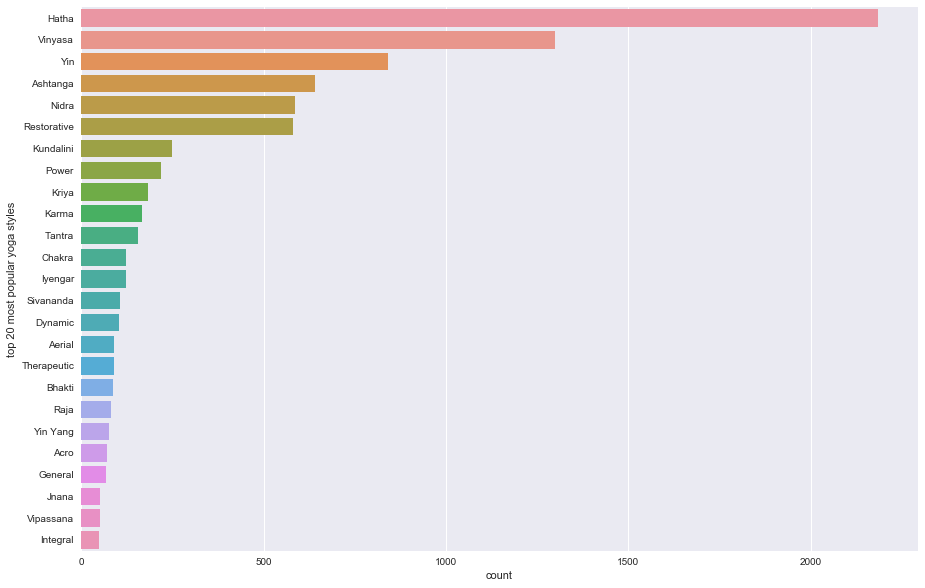

In [66]:
plt.figure(figsize=(15,10))
ax = sns.barplot(y='style_split', x='count', data=style_data_df)
ax.set_ylabel('top 20 most popular yoga styles')
